In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
data=pd.read_csv('creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Visualization before handling Imbalace data

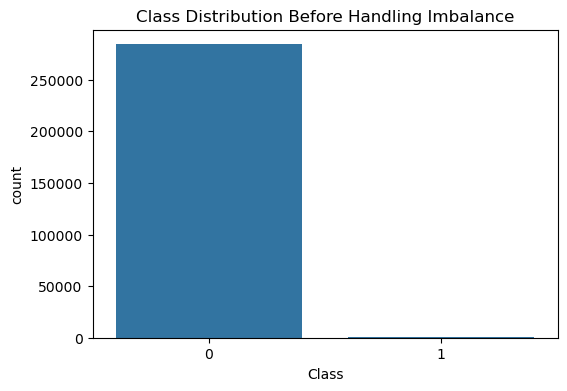

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Normalize the 'Amount' feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution Before Handling Imbalance')
plt.show()




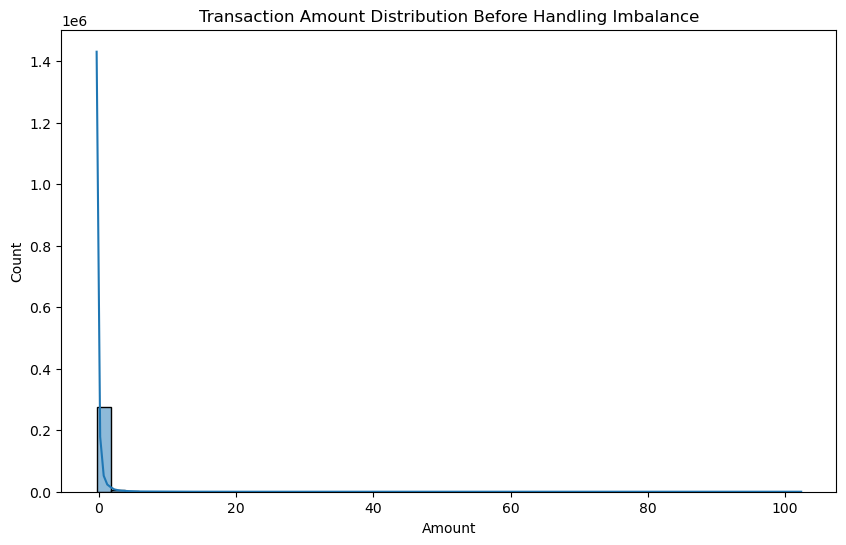

In [7]:
# Distribution of Transaction Amount
plt.figure(figsize=(10,6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution Before Handling Imbalance')
plt.show()



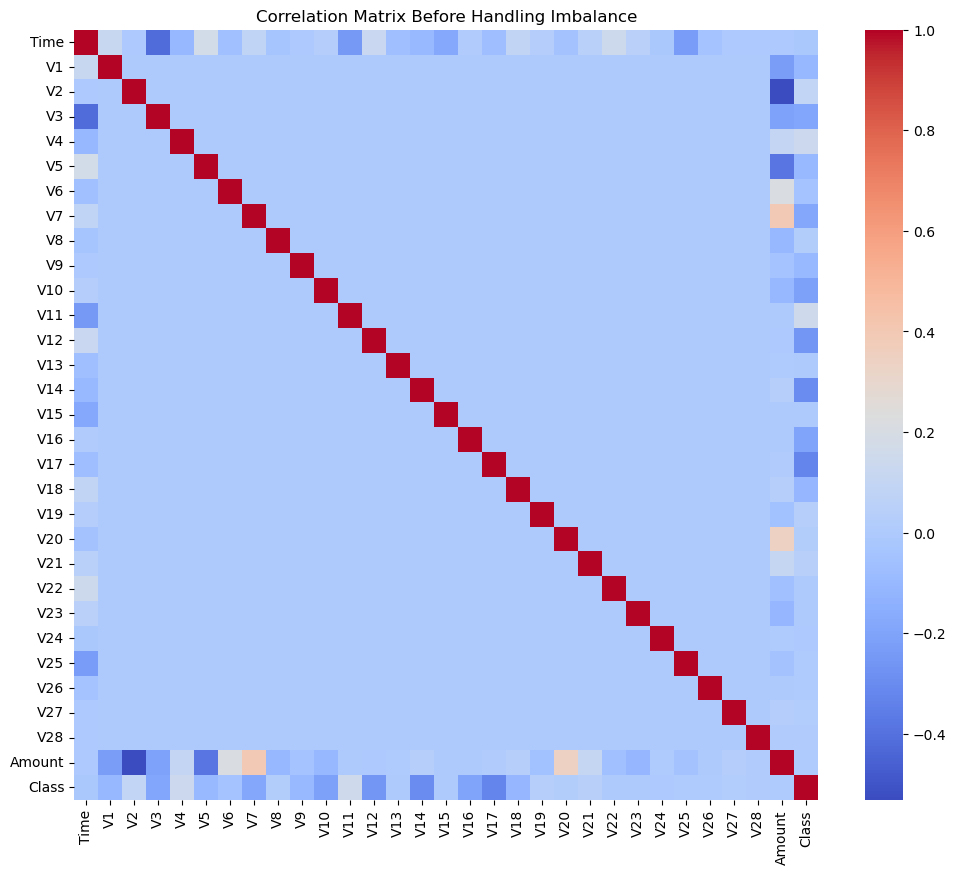

In [8]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Before Handling Imbalance')
plt.show()



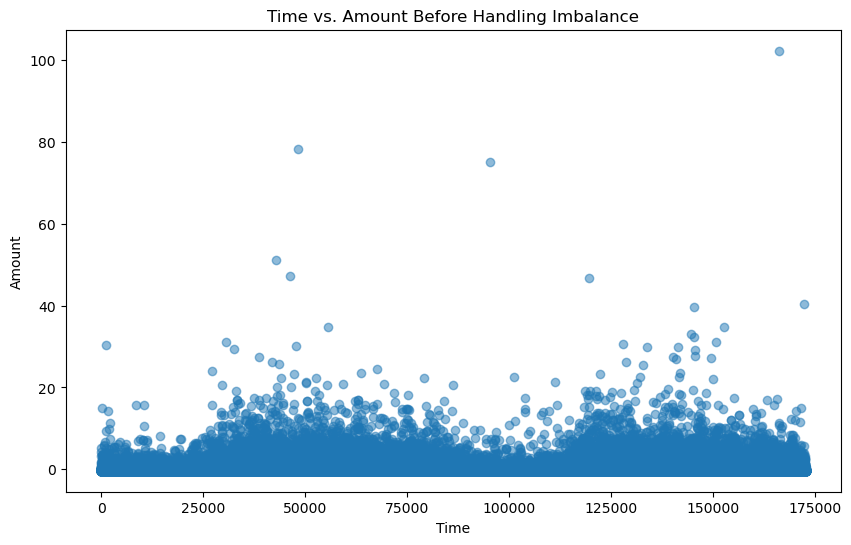

In [9]:
# Time vs. Amount
plt.figure(figsize=(10,6))
plt.scatter(data['Time'], data['Amount'], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time vs. Amount Before Handling Imbalance')
plt.show()

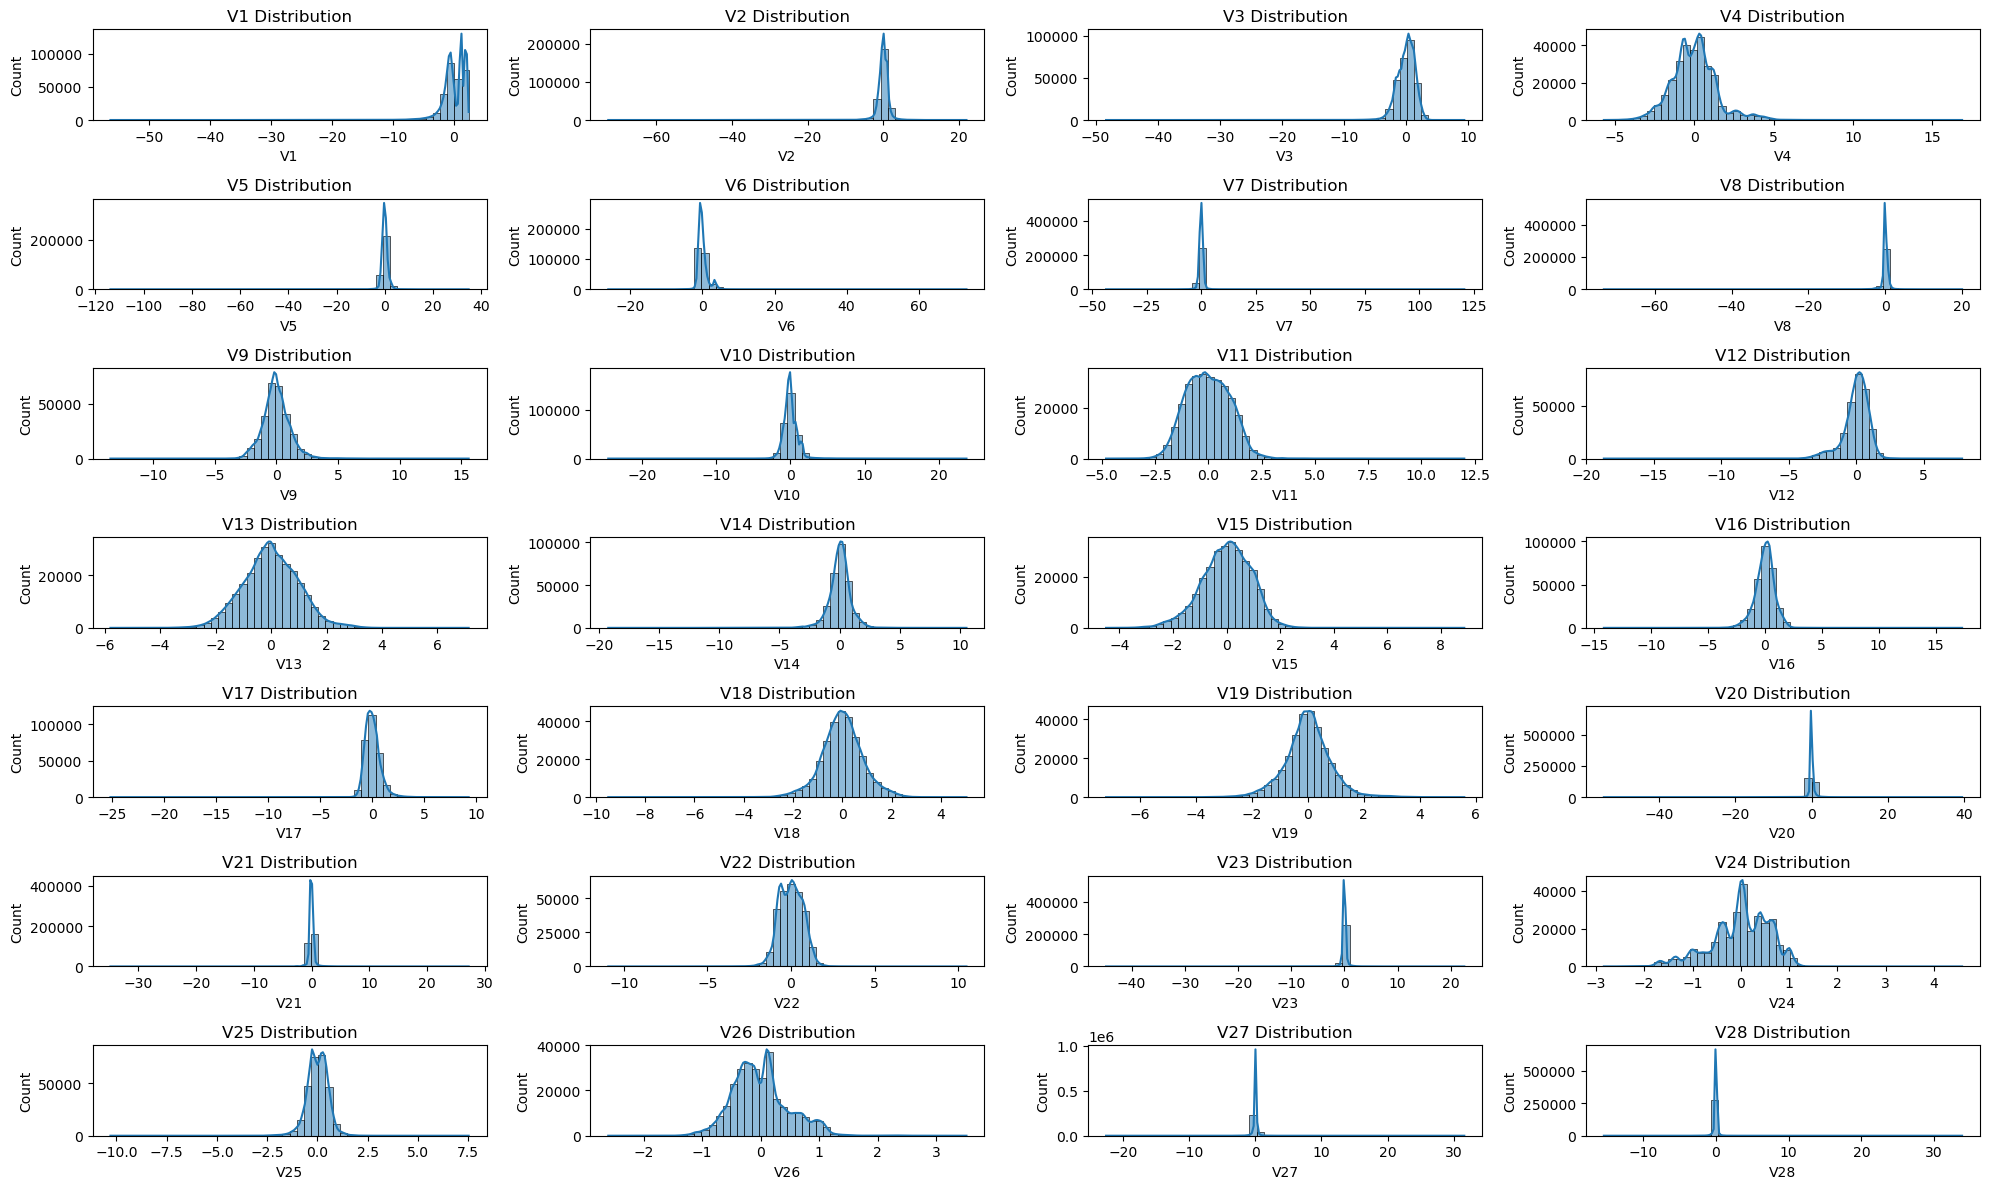

In [10]:
# PCA Components Distribution
plt.figure(figsize=(20,12))
for i in range(1, 29):
    plt.subplot(7, 4, i)
    sns.histplot(data[f'V{i}'], bins=50, kde=True)
    plt.title(f'V{i} Distribution')
plt.tight_layout()
plt.show()



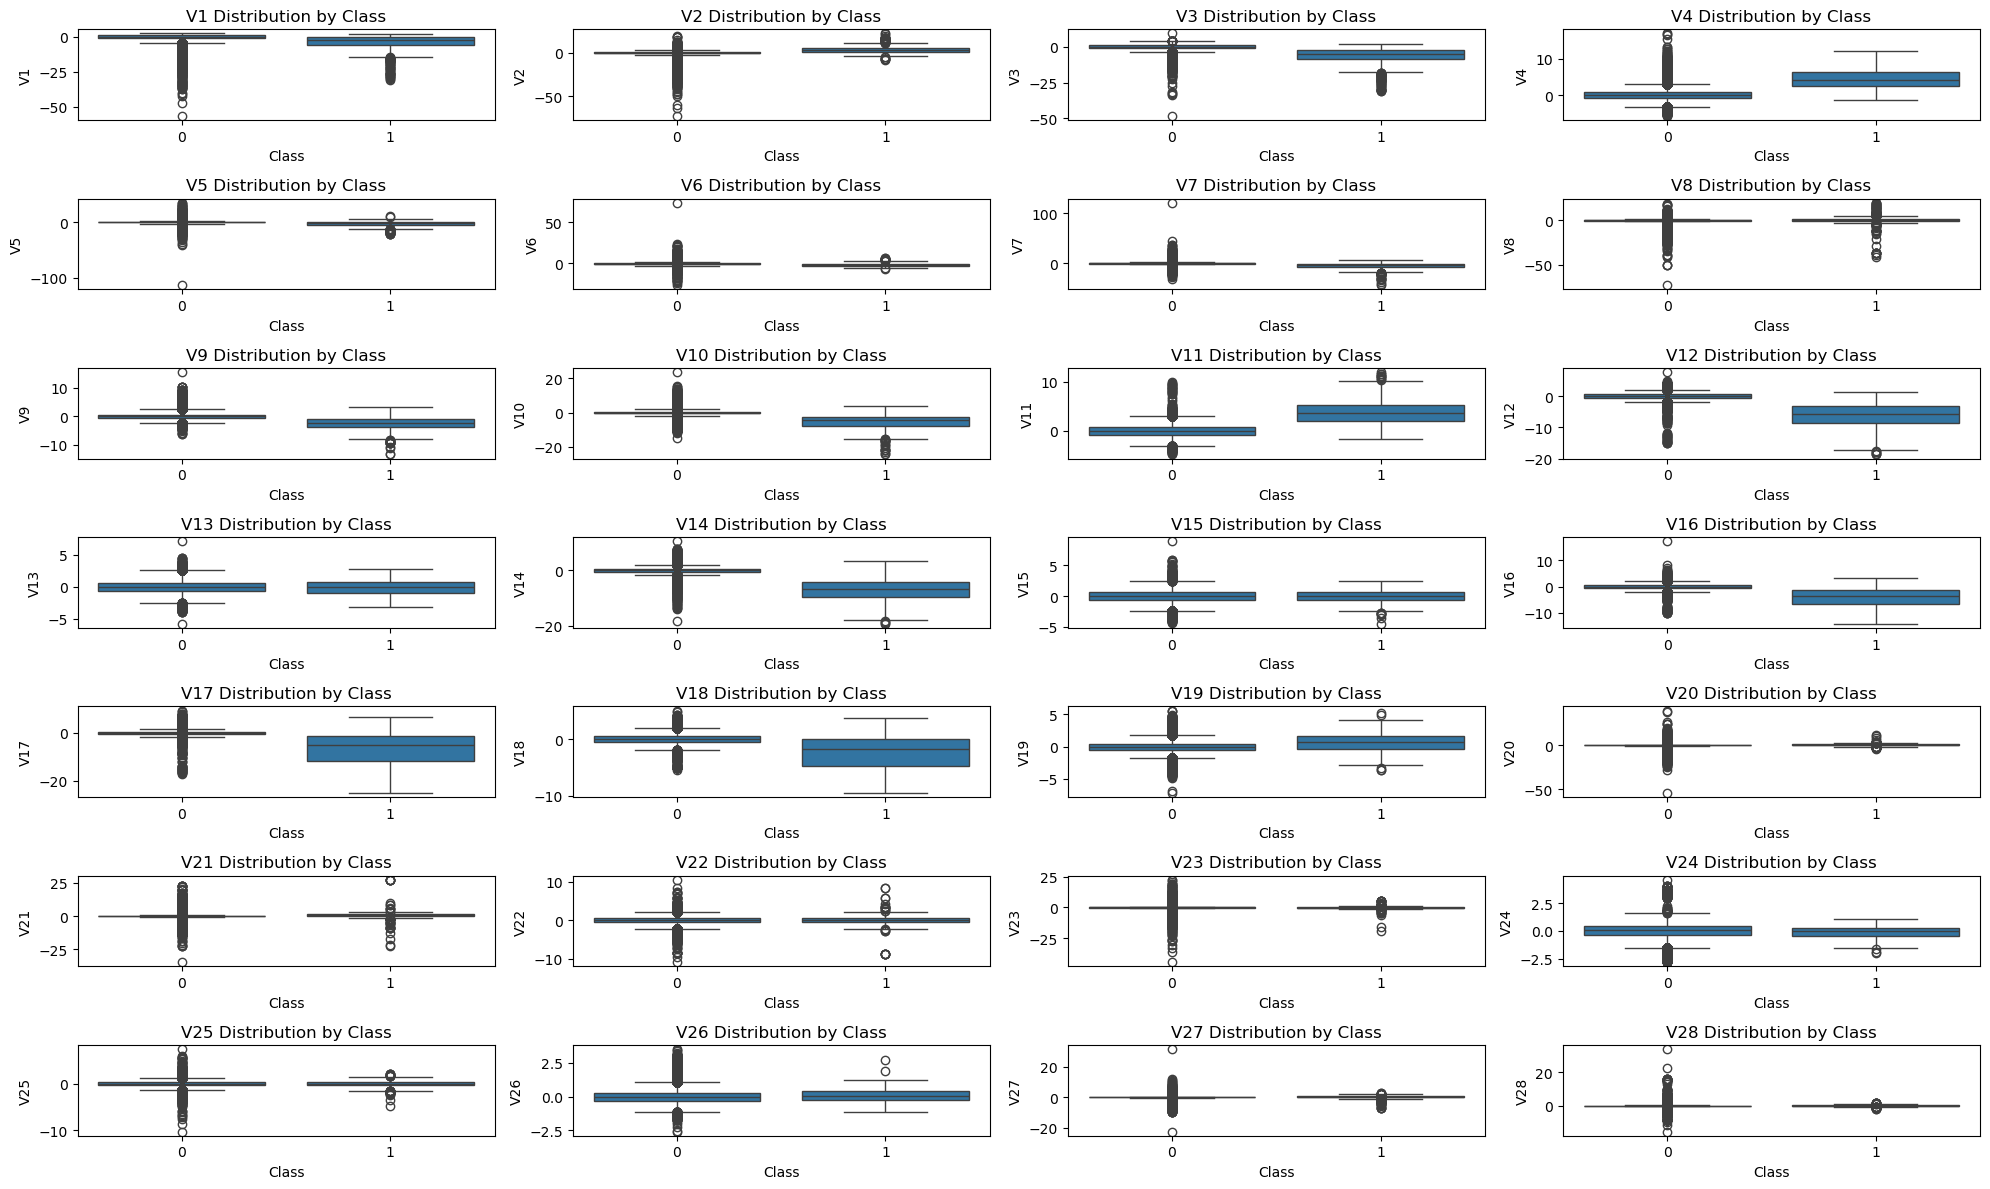

In [11]:
# Class Distribution for PCA Components
plt.figure(figsize=(20,12))
for i in range(1, 29):
    plt.subplot(7, 4, i)
    sns.boxplot(x='Class', y=f'V{i}', data=data)
    plt.title(f'V{i} Distribution by Class')
plt.tight_layout()
plt.show()


# Under sampling to Handle Imbalanced Data

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


# Normalize the 'Amount' feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])


print("Class distribution before undersampling:")
print(data['Class'].value_counts())

# Separate the majority and minority classes
df_majority = data[data.Class == 0]
df_minority = data[data.Class == 1]

# Undersample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    
                                   n_samples=len(df_minority),     
                                   random_state=42)  


df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# class distribution after undersampling
print("\nClass distribution after undersampling:")
print(df_downsampled['Class'].value_counts())


X = df_downsampled.drop(columns=['Class'])
y = df_downsampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)


Class distribution before undersampling:
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution after undersampling:
Class
0    492
1    492
Name: count, dtype: int64

Shape of training set: (787, 30)
Shape of testing set: (197, 30)


In [14]:
df_downsampled.to_csv("Balanced_creditcard(undersampling).csv",index=False)

# Visualization after Handling with Imbalanced data

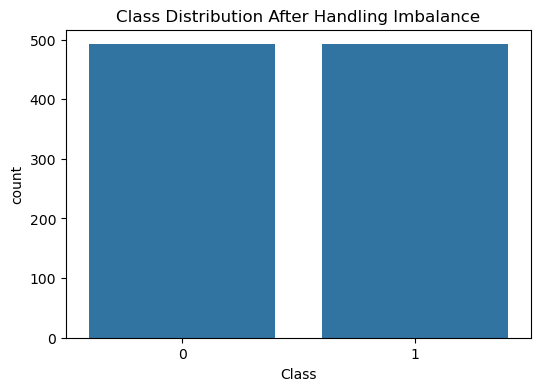

In [15]:
# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df_downsampled)
plt.title('Class Distribution After Handling Imbalance')
plt.show()



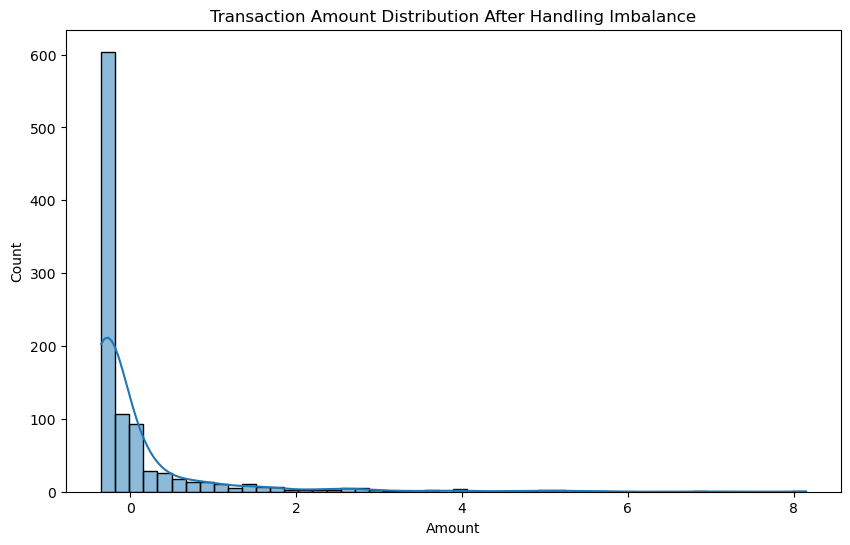

In [16]:
# Distribution of Transaction Amount
plt.figure(figsize=(10,6))
sns.histplot(df_downsampled['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution After Handling Imbalance')
plt.show()

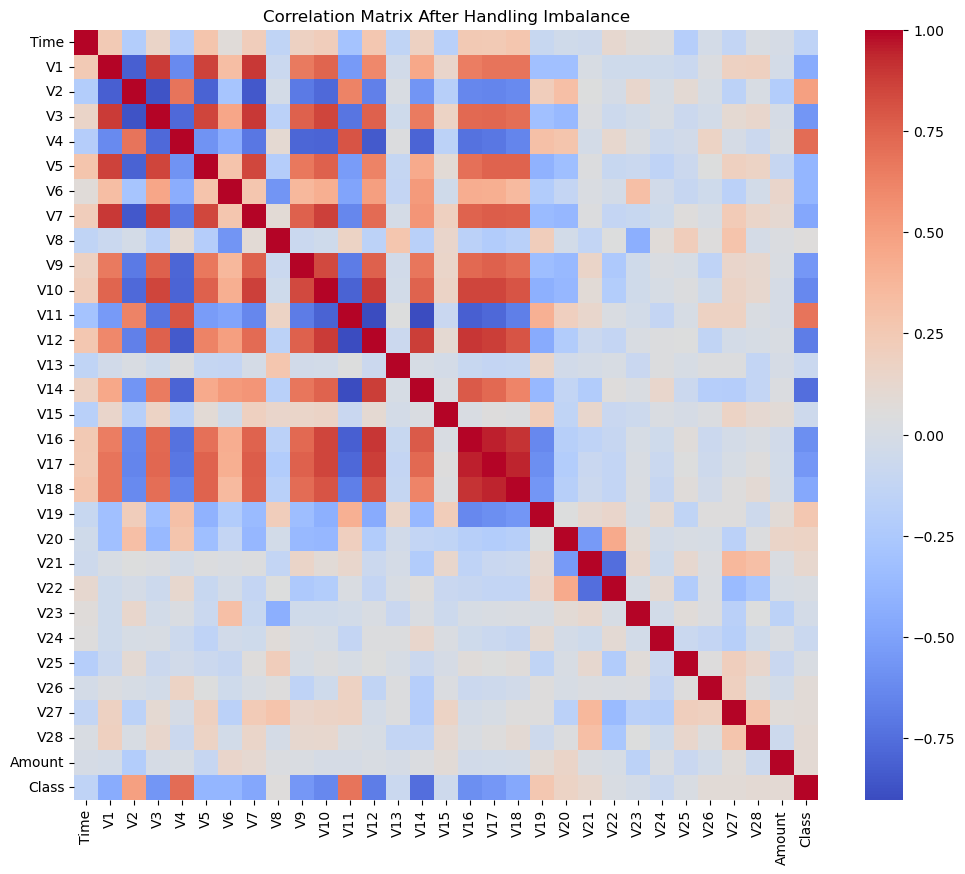

In [17]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
correlation_matrix_downsampled = df_downsampled.corr()
sns.heatmap(correlation_matrix_downsampled, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix After Handling Imbalance')
plt.show()



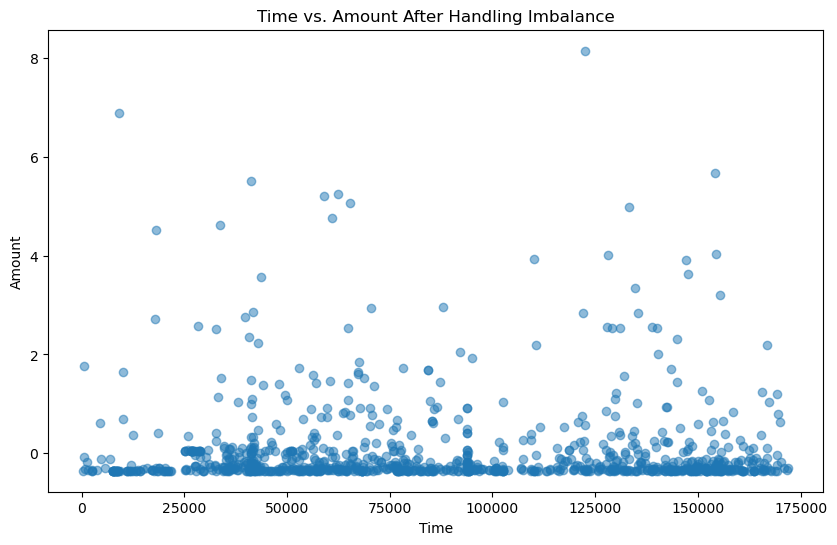

In [18]:
# Time vs. Amount
plt.figure(figsize=(10,6))
plt.scatter(df_downsampled['Time'], df_downsampled['Amount'], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time vs. Amount After Handling Imbalance')
plt.show()

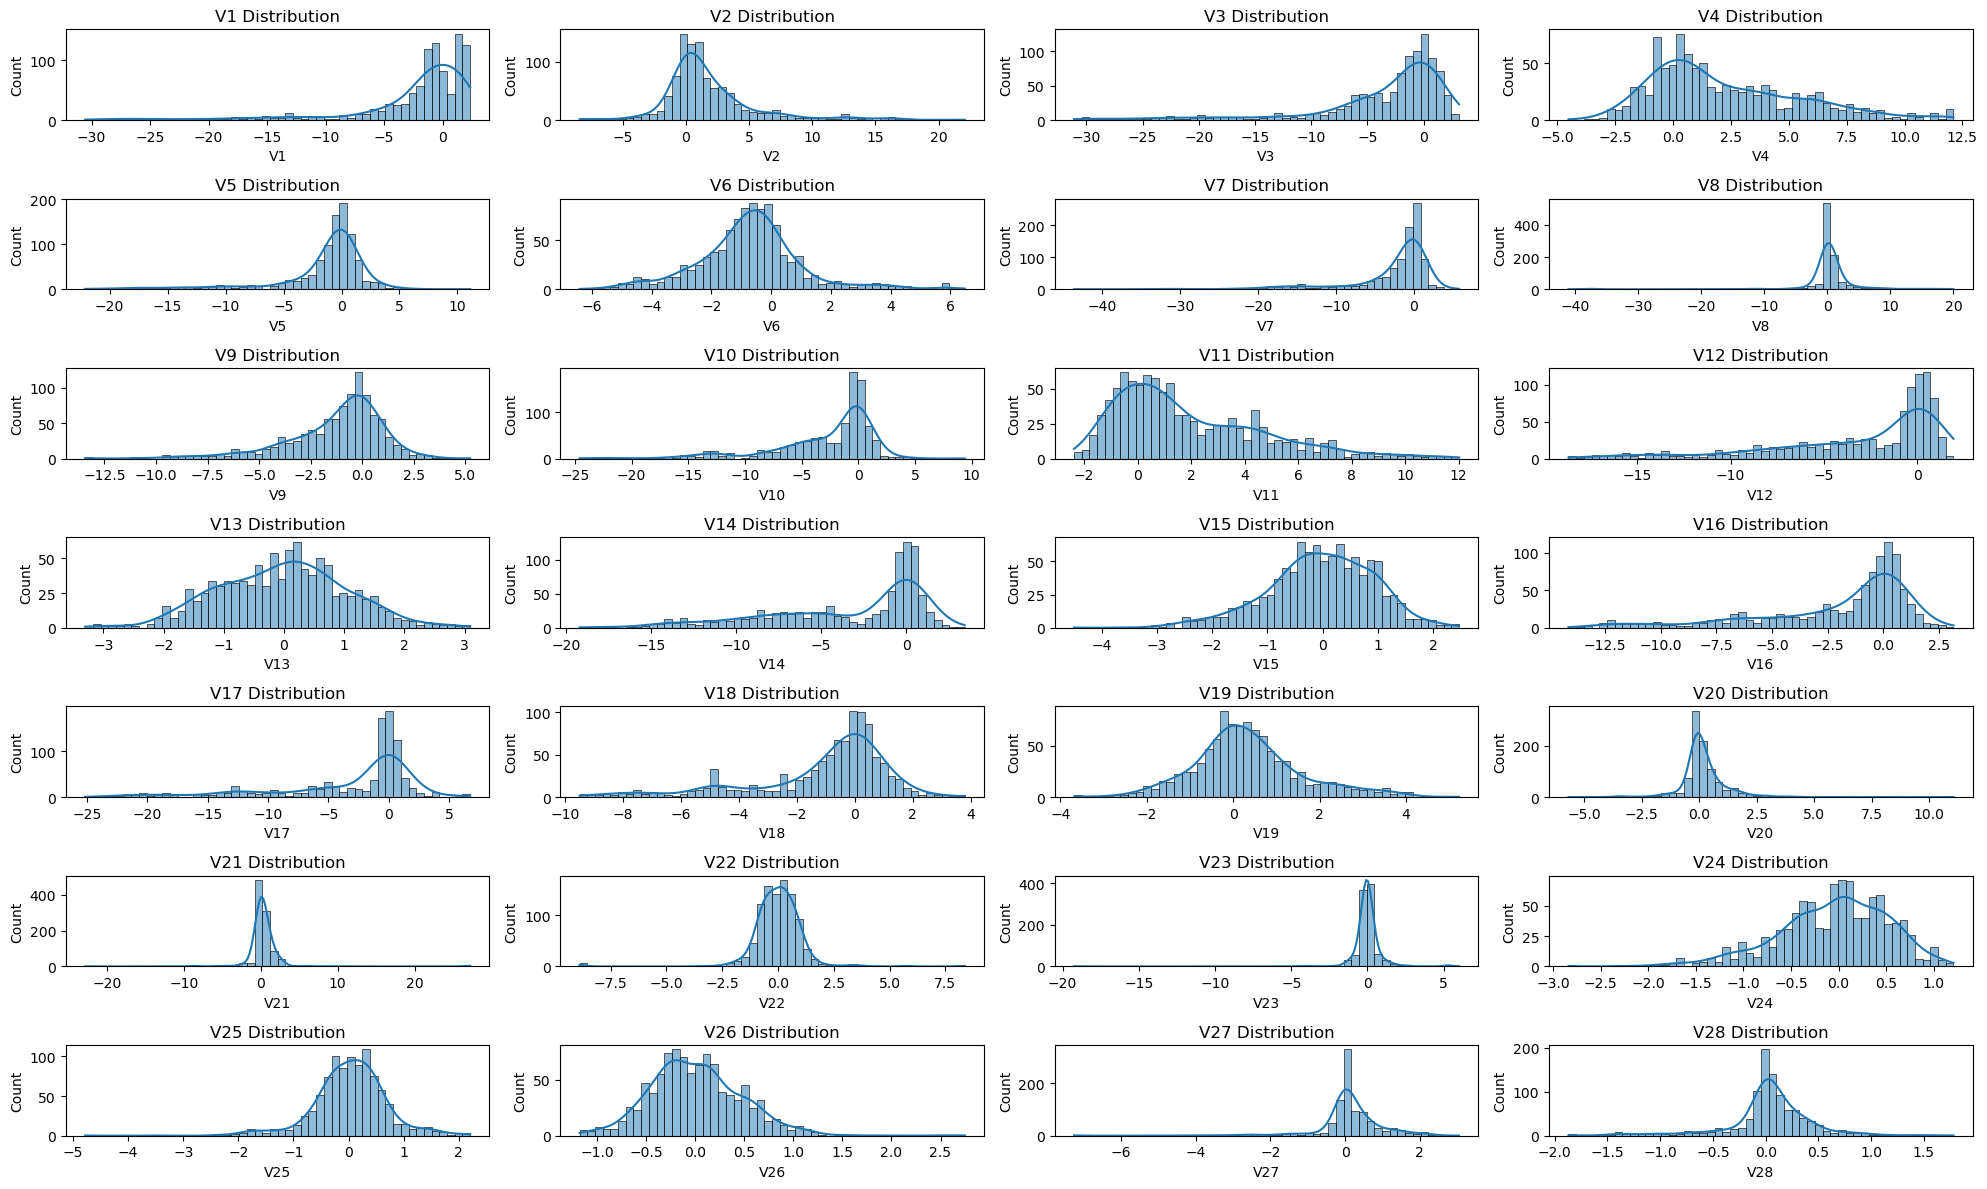

In [19]:
# PCA Components Distribution
plt.figure(figsize=(20,12))
for i in range(1, 29):
    plt.subplot(7, 4, i)
    sns.histplot(df_downsampled[f'V{i}'], bins=50, kde=True)
    plt.title(f'V{i} Distribution')
plt.tight_layout()
plt.show()



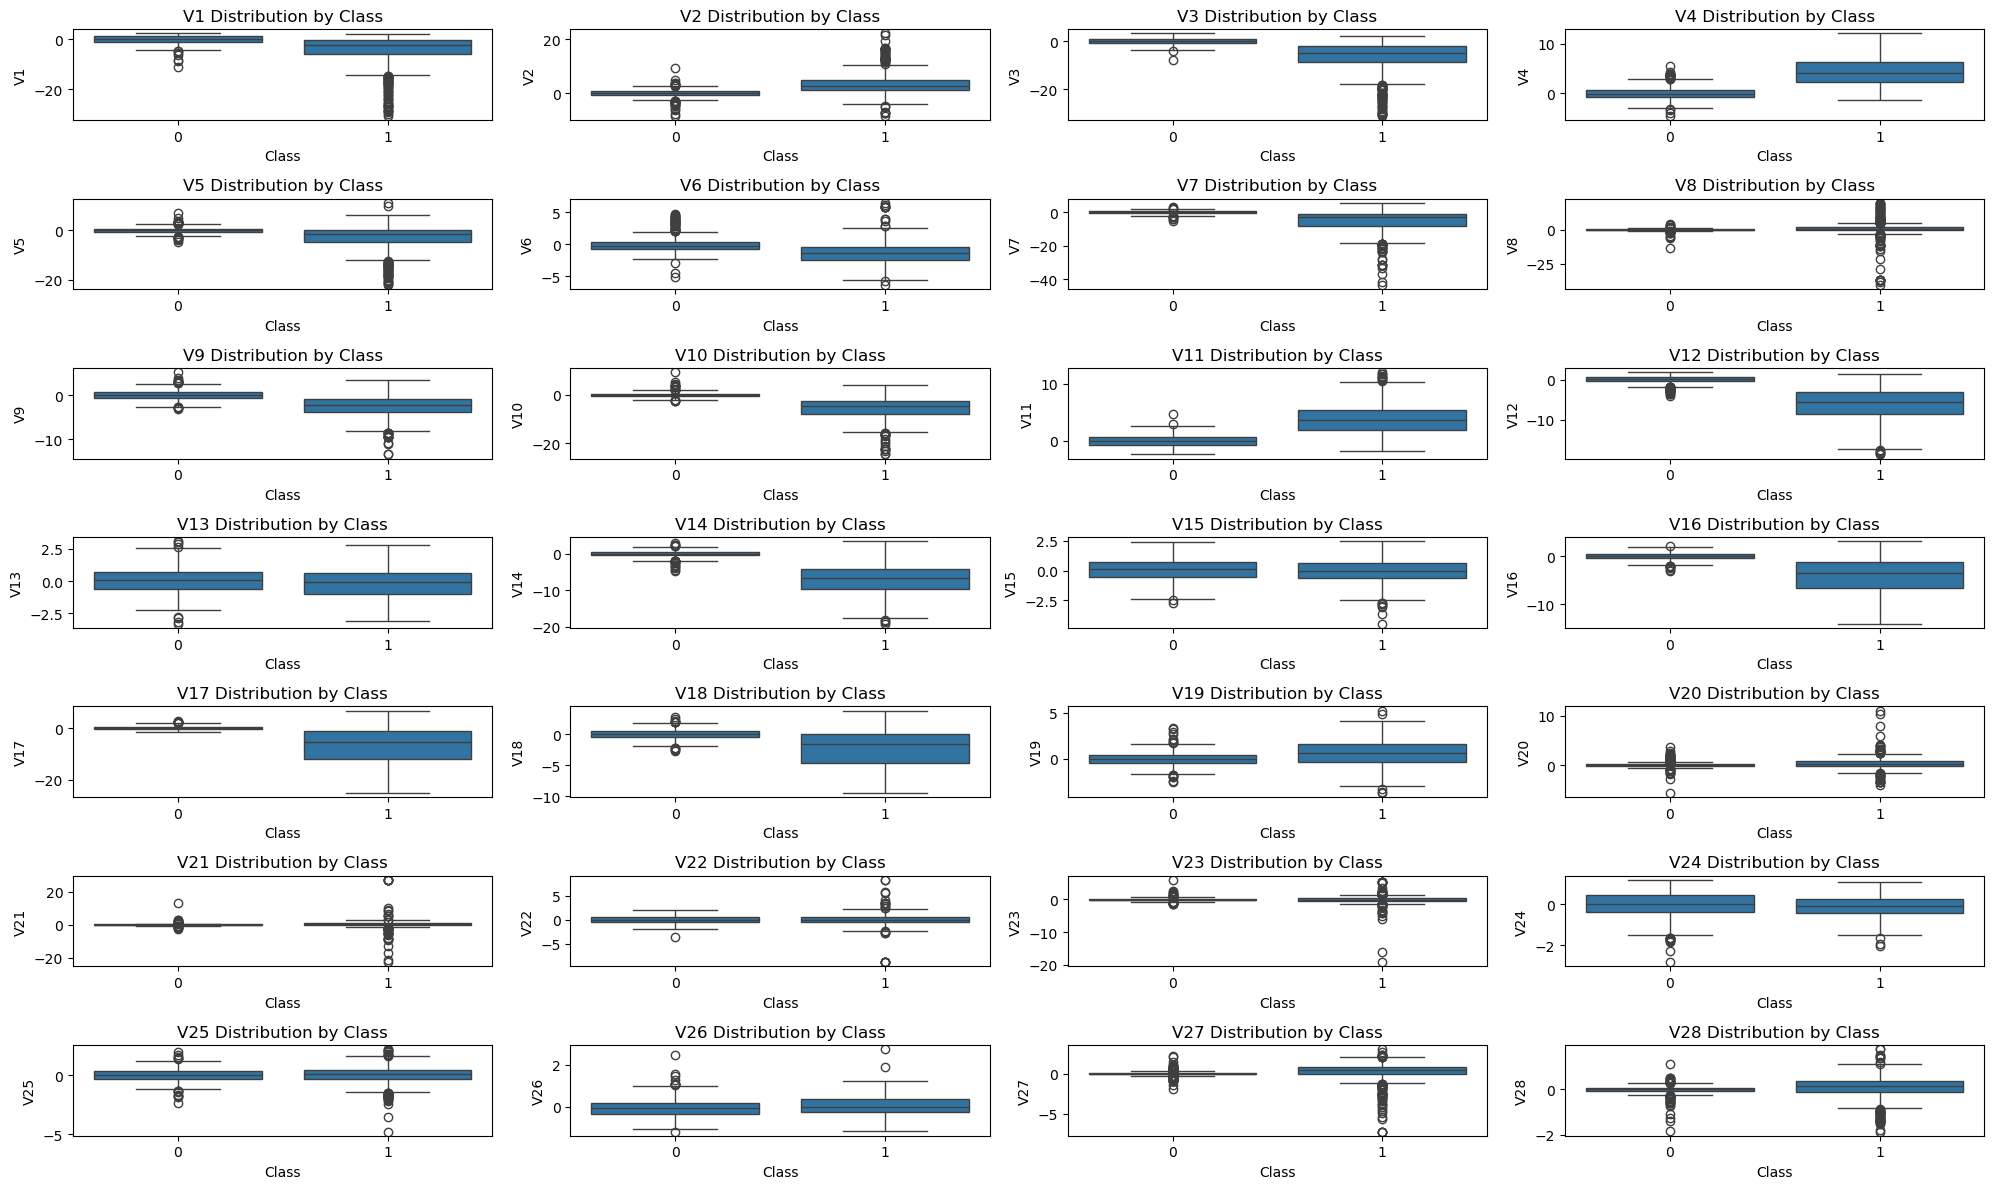

In [20]:
# Class Distribution for PCA Components
plt.figure(figsize=(20,12))
for i in range(1, 29):
    plt.subplot(7, 4, i)
    sns.boxplot(x='Class', y=f'V{i}', data=df_downsampled)
    plt.title(f'V{i} Distribution by Class')
plt.tight_layout()
plt.show()


# Model Training

In [22]:
# Selecting features and target variable
X = df_downsampled.drop('Class', axis=1)
y = df_downsampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
# Define a function to print evaluation metrics
def print_evaluation_metrics(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


# Logistic Regression

In [29]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

C:\Users\HARSHAVA-B024DC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [30]:
y_pred_log_reg = log_reg.predict(X_test)

In [31]:
# Evaluation
print_evaluation_metrics(y_test, y_pred_log_reg, "Logistic Regression")


Evaluation Metrics for Logistic Regression:
Accuracy: 0.9324324324324325
Precision: 0.9701492537313433
Recall: 0.8904109589041096
F1 Score: 0.9285714285714286
Confusion Matrix:
[[146   4]
 [ 16 130]]




# xgboost

In [39]:
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print_evaluation_metrics(y_test, y_pred_xgb, "XGBoost")


Evaluation Metrics for XGBoost:
Accuracy: 0.9256756756756757
Precision: 0.9492753623188406
Recall: 0.8972602739726028
F1 Score: 0.9225352112676056
Confusion Matrix:
[[143   7]
 [ 15 131]]




C:\Users\HARSHAVA-B024DC\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:15:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Random Forest Classifier

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# parameter grid 
param_grid_rf = {
    'n_estimators': [ 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, scoring='f1')

grid_search_rf.fit(X_train, y_train)

# best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Training the model with the best parameters
best_rf_clf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_clf.fit(X_train, y_train)
y_pred_best_rf = best_rf_clf.predict(X_test)

# Model evaluation
print_evaluation_metrics(y_test, y_pred_best_rf, "Random Forest with GridSearchCV")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Evaluation Metrics for Random Forest with GridSearchCV:
Accuracy: 0.9324324324324325
Precision: 0.9632352941176471
Recall: 0.8972602739726028
F1 Score: 0.9290780141843972
Confusion Matrix:
[[145   5]
 [ 15 131]]


